In [1]:
pip install tpot


Note: you may need to restart the kernel to use updated packages.


In [2]:
from tpot import TPOTClassifier


In [3]:
# Is project


In [4]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold



Using TensorFlow backend.
/home/caroline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caroline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caroline/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caroline/anaconda3/lib/python3.7/site-packag

# Feature Engineering

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,BAIS,A,2014,private,134200,0.0,Parent,1.0,1.0,unemployed,employed,none,no,0.0,152000,NaN,2,134272.0,no
1,BAC,B+,2015,private,90000,0.0,Parent,1.0,1.0,self employed,employed,none,no,130000.0,152000,130000.0,7,NaN,no
2,BAC,B,2017,ExtraCounty,53000,0.0,Guardian,0.0,0.0,deceased,deceased,brother,employed,0.0,0,50000.0,NaN,NaN,no
3,BAC,C+,2016,private,89186,0.0,Scholarship,1.0,1.0,self employed,unemployed,none,self employed,130000.0,25000,0.0,2,NaN,no
4,BAIS,C+,2016,ExtraCounty,58000,166294.0,Parent,1.0,0.0,deceased,employed,none,no,0.0,40000,60000.0,no,NaN,no


In [7]:
data.dtypes

Courses                   object
Grade                     object
Year                       int64
SchoolCategory            object
FeesPer Year               int64
FeeBalance               float64
PaymentMode               object
MotherAlive              float64
FatherAlive              float64
FatherEmployment          object
MothersEmployment         object
Guardian                  object
GuardianEmployment        object
FatherFinancialIncome    float64
MotherFinancialIncome      int64
Amount                   float64
Siblings                  object
SiblingsFees             float64
Awarded                   object
dtype: object

In [8]:
data.isnull().sum()

Courses                   0
Grade                     1
Year                      0
SchoolCategory           11
FeesPer Year              0
FeeBalance                1
PaymentMode               7
MotherAlive              14
FatherAlive              20
FatherEmployment         21
MothersEmployment        11
Guardian                  2
GuardianEmployment        3
FatherFinancialIncome     3
MotherFinancialIncome     0
Amount                   23
Siblings                 23
SiblingsFees             63
Awarded                   0
dtype: int64

### Null values

#### Grade column

In [9]:
data['Grade'].fillna('B' ,inplace=True)


In [10]:
data['Grade'].value_counts()

B     61
C+    30
B+    14
A     12
C      6
D+     1
Name: Grade, dtype: int64

#### School category

In [11]:
data['SchoolCategory'].value_counts()

private        47
county         30
ExtraCounty    19
national       12
other           5
Name: SchoolCategory, dtype: int64

In [12]:
data['SchoolCategory'].fillna('private', inplace=True)

#### Mother Alive

In [13]:
data['MotherAlive'] = np.where((data['MothersEmployment'].notna()), #1 means alive
                                   1,data['MotherAlive'])


In [14]:
data['MotherAlive'] = np.where(data['MothersEmployment']=="deceased", #0 means deceased
                                   0,data['MotherAlive'])


In [15]:
data['MotherAlive'].fillna(2, inplace=True) #2 means it was left blank

#### Father Alive

In [16]:
data['FatherAlive'] = np.where((data['FatherEmployment'].notna()),  #1 means alive
                                   1,data['FatherAlive'])


In [17]:
data['FatherAlive'] = np.where(data['FatherEmployment']=="deceased",  #0 means deceased
                                   0,data['FatherAlive'])


In [18]:
data['FatherAlive'].fillna(2, inplace=True) #2 means it was left blank

#### fee balance

In [19]:
data['FeeBalance'].fillna(0, inplace=True)

#### siblings

In [20]:
data['Siblings'] = np.where((data['SiblingsFees'].isnull()),
                                   0,data['Siblings'])


In [21]:
smode_filler = data['Siblings'].mode()

In [22]:
data['Siblings'].fillna(smode_filler, inplace=True)

In [23]:
data['Siblings'].fillna(0, inplace= True)

#### siblings fees

In [24]:
data['SiblingsFees'] = np.where(data['Siblings']==0,
                                   0,data['SiblingsFees'])


#### Payment  Mode

In [25]:
data['PaymentMode'].value_counts()

Parent                    61
Scholarship               31
Guardian                  16
relative                   3
Parent and Scholarship     3
wellwisher                 2
fundraising                1
Name: PaymentMode, dtype: int64

In [26]:
data['PaymentMode'].fillna('Parent', inplace=True)

#### Father Employment Status

In [27]:
data['FatherEmployment'].value_counts()

employed         30
deceased         29
self employed    23
unemployed        9
retired           5
casual worker     4
blank             3
Name: FatherEmployment, dtype: int64

In [28]:
data['FatherEmployment'] = np.where(data['FatherAlive']==0,  #0 means deceased
                                   "blank",data['FatherEmployment'])

In [29]:
data['FatherEmployment'] = np.where(data['FatherAlive']==2,  #2 means fatherAlive was left blank
                                   "blank",data['FatherEmployment'])

In [30]:
data['FatherEmployment'].fillna('employed', inplace = True)

#### Mother Employment Status

In [31]:
data['MothersEmployment'].value_counts()

employed         34
self employed    32
unemployed       21
deceased         14
casual worker    10
retired           2
Name: MothersEmployment, dtype: int64

In [32]:
data['MothersEmployment'] = np.where(data['MotherAlive']==0,  #0 means deceased
                                   "blank",data['MothersEmployment'])

In [33]:
data['MothersEmployment'] = np.where(data['MotherAlive']==2,  #2 means MotherAlive was left blank
                                   "blank",data['MothersEmployment'])

In [34]:
data['MothersEmployment'].fillna ('employed',inplace = True)

#### Guardian

In [35]:
data['Guardian'].value_counts()

none           93
other           7
uncle           6
brother         5
aunt            5
sister          3
grandfather     1
Grandmother     1
wellwisher      1
Name: Guardian, dtype: int64

In [36]:
data['Guardian'].fillna('none', inplace = True)

#### Guardian Employment

In [37]:
data['GuardianEmployment'].value_counts()

no               92
employed         17
self employed     8
retired           2
unemployed        1
casual worker     1
Name: GuardianEmployment, dtype: int64

In [38]:
data['GuardianEmployment'] = np.where(data['Guardian']=="none",  
                                   "no",data['GuardianEmployment'])

In [39]:
data['GuardianEmployment'].fillna('no', inplace= True)

#### Financial Income

In [40]:
data['MotherFinancialIncome'] = np.where(data['MothersEmployment']=="deceased",
                                   0,data['MotherFinancialIncome'])

In [41]:
data['FatherFinancialIncome'] = np.where(data['FatherEmployment']=="deceased",
                                   0,data['FatherFinancialIncome'])

In [42]:
data['FatherFinancialIncome'] = np.where(data['FatherEmployment']=="unemployed",
                                   0,data['FatherFinancialIncome'])

In [43]:
median_filler = data['FatherFinancialIncome'].median()

In [44]:
data['FatherFinancialIncome'].fillna(median_filler, inplace=True)

#### Amount Able to pay

In [45]:
amount_filler = data['Amount'].median()

In [46]:
data['Amount'].fillna(amount_filler, inplace=True)

In [47]:
data.isnull().sum()

Courses                  0
Grade                    0
Year                     0
SchoolCategory           0
FeesPer Year             0
FeeBalance               0
PaymentMode              0
MotherAlive              0
FatherAlive              0
FatherEmployment         0
MothersEmployment        0
Guardian                 0
GuardianEmployment       0
FatherFinancialIncome    0
MotherFinancialIncome    0
Amount                   0
Siblings                 0
SiblingsFees             0
Awarded                  0
dtype: int64

### Encoding

#### Courses

In [48]:

le = LabelEncoder()
le.fit(data['Courses'])


LabelEncoder()

In [49]:
list(le.classes_)


['BAC',
 'BADSP',
 'BAIS',
 'BBSACT',
 'BBSFE',
 'BBSFEN',
 'BCOM',
 'BHM',
 'CFA',
 'CPA',
 'DBM',
 'LLB']

In [50]:
data.Courses = le.transform(data['Courses']) 


In [51]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,2,A,2014,private,134200,0.0,Parent,1.0,1.0,unemployed,employed,none,no,0.0,152000,25000.0,2,134272.0,no
1,0,B+,2015,private,90000,0.0,Parent,1.0,1.0,self employed,employed,none,no,130000.0,152000,130000.0,0,0.0,no
2,0,B,2017,ExtraCounty,53000,0.0,Guardian,0.0,0.0,blank,blank,brother,employed,0.0,0,50000.0,0,0.0,no
3,0,C+,2016,private,89186,0.0,Scholarship,1.0,1.0,self employed,unemployed,none,no,130000.0,25000,0.0,0,0.0,no
4,2,C+,2016,ExtraCounty,58000,166294.0,Parent,1.0,0.0,blank,employed,none,no,0.0,40000,60000.0,0,0.0,no


#### Grade

In [52]:
le.fit(data['Grade'])


LabelEncoder()

In [53]:
list(le.classes_)

['A', 'B', 'B+', 'C', 'C+', 'D+']

In [54]:
data.Grade = le.transform(data['Grade'])

In [55]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,2,0,2014,private,134200,0.0,Parent,1.0,1.0,unemployed,employed,none,no,0.0,152000,25000.0,2,134272.0,no
1,0,2,2015,private,90000,0.0,Parent,1.0,1.0,self employed,employed,none,no,130000.0,152000,130000.0,0,0.0,no
2,0,1,2017,ExtraCounty,53000,0.0,Guardian,0.0,0.0,blank,blank,brother,employed,0.0,0,50000.0,0,0.0,no
3,0,4,2016,private,89186,0.0,Scholarship,1.0,1.0,self employed,unemployed,none,no,130000.0,25000,0.0,0,0.0,no
4,2,4,2016,ExtraCounty,58000,166294.0,Parent,1.0,0.0,blank,employed,none,no,0.0,40000,60000.0,0,0.0,no


#### School Category

In [56]:
le.fit(data['SchoolCategory'])

LabelEncoder()

In [57]:
list(le.classes_)

['ExtraCounty', 'county', 'national', 'other', 'private']

In [58]:
data.SchoolCategory = le.transform(data['SchoolCategory'])

In [59]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,2,0,2014,4,134200,0.0,Parent,1.0,1.0,unemployed,employed,none,no,0.0,152000,25000.0,2,134272.0,no
1,0,2,2015,4,90000,0.0,Parent,1.0,1.0,self employed,employed,none,no,130000.0,152000,130000.0,0,0.0,no
2,0,1,2017,0,53000,0.0,Guardian,0.0,0.0,blank,blank,brother,employed,0.0,0,50000.0,0,0.0,no
3,0,4,2016,4,89186,0.0,Scholarship,1.0,1.0,self employed,unemployed,none,no,130000.0,25000,0.0,0,0.0,no
4,2,4,2016,0,58000,166294.0,Parent,1.0,0.0,blank,employed,none,no,0.0,40000,60000.0,0,0.0,no


#### Payment Mode

In [60]:
le.fit(data['PaymentMode'])

LabelEncoder()

In [61]:
list(le.classes_)

['Guardian',
 'Parent',
 'Parent and Scholarship',
 'Scholarship',
 'fundraising',
 'relative',
 'wellwisher']

In [62]:
data.PaymentMode = le.transform(data['PaymentMode'])

In [63]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,2,0,2014,4,134200,0.0,1,1.0,1.0,unemployed,employed,none,no,0.0,152000,25000.0,2,134272.0,no
1,0,2,2015,4,90000,0.0,1,1.0,1.0,self employed,employed,none,no,130000.0,152000,130000.0,0,0.0,no
2,0,1,2017,0,53000,0.0,0,0.0,0.0,blank,blank,brother,employed,0.0,0,50000.0,0,0.0,no
3,0,4,2016,4,89186,0.0,3,1.0,1.0,self employed,unemployed,none,no,130000.0,25000,0.0,0,0.0,no
4,2,4,2016,0,58000,166294.0,1,1.0,0.0,blank,employed,none,no,0.0,40000,60000.0,0,0.0,no


#### Father Employment

In [64]:
le.fit(data['FatherEmployment'])

LabelEncoder()

In [65]:
list(le.classes_)

['blank',
 'casual worker',
 'employed',
 'retired',
 'self employed',
 'unemployed']

In [66]:
data.FatherEmployment = le.transform(data['FatherEmployment'])

#### Mother Employment

In [67]:
le.fit(data['MothersEmployment'])

LabelEncoder()

In [68]:
list(le.classes_)

['blank',
 'casual worker',
 'employed',
 'retired',
 'self employed',
 'unemployed']

In [69]:
data.MothersEmployment = le.transform(data['MothersEmployment'])

#### Guardian Employment

In [70]:
le.fit(data['GuardianEmployment'])

LabelEncoder()

In [71]:
list(le.classes_)

['casual worker', 'employed', 'no', 'retired', 'self employed', 'unemployed']

In [72]:
data.GuardianEmployment = le.transform(data['GuardianEmployment'])

#### Awarded

In [73]:
le.fit(data.Awarded)

LabelEncoder()

In [74]:
list(le.classes_)

['no', 'yes']

In [75]:
data.Awarded = le.transform(data['Awarded'])

#### Guardian

In [76]:
le.fit(data.Guardian)

LabelEncoder()

In [77]:
list(le.classes_)

['Grandmother',
 'aunt',
 'brother',
 'grandfather',
 'none',
 'other',
 'sister',
 'uncle',
 'wellwisher']

In [78]:
data.Guardian = le.transform(data['Guardian'])

In [79]:
data.head()

,Courses,Grade,Year,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees,Awarded
0,2,0,2014,4,134200,0.0,1,1.0,1.0,5,2,4,2,0.0,152000,25000.0,2,134272.0,0
1,0,2,2015,4,90000,0.0,1,1.0,1.0,4,2,4,2,130000.0,152000,130000.0,0,0.0,0
2,0,1,2017,0,53000,0.0,0,0.0,0.0,0,0,2,1,0.0,0,50000.0,0,0.0,0
3,0,4,2016,4,89186,0.0,3,1.0,1.0,4,5,4,2,130000.0,25000,0.0,0,0.0,0
4,2,4,2016,0,58000,166294.0,1,1.0,0.0,0,2,4,2,0.0,40000,60000.0,0,0.0,0


# Model

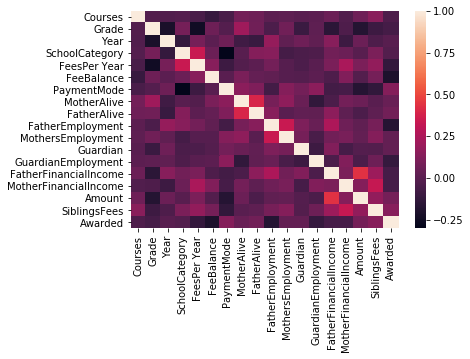

In [80]:
sns.heatmap(data.corr())

In [81]:
#X = data.drop(columns=['Awarded'])
y=data['Awarded']


In [82]:
#X=data[['Courses','Grade','FeesPer Year','FeeBalance','FatherEmployment','MothersEmployment','GuardianEmployment','FatherFinancialIncome','MotherFinancialIncome','Amount','SiblingsFees']]
X = data.drop(columns=['Awarded','Year'])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.708421052631579
Generation 2 - Current best internal CV score: 0.708421052631579
Generation 3 - Current best internal CV score: 0.708421052631579
Generation 4 - Current best internal CV score: 0.708421052631579
Generation 5 - Current best internal CV score: 0.708421052631579

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=8, max_features=0.45, min_samples_leaf=6, min_samples_split=4, n_estimators=100, subsample=0.6500000000000001)
0.8


In [85]:
X.head()


,Courses,Grade,SchoolCategory,FeesPer Year,FeeBalance,PaymentMode,MotherAlive,FatherAlive,FatherEmployment,MothersEmployment,Guardian,GuardianEmployment,FatherFinancialIncome,MotherFinancialIncome,Amount,Siblings,SiblingsFees
0,2,0,4,134200,0.0,1,1.0,1.0,5,2,4,2,0.0,152000,25000.0,2,134272.0
1,0,2,4,90000,0.0,1,1.0,1.0,4,2,4,2,130000.0,152000,130000.0,0,0.0
2,0,1,0,53000,0.0,0,0.0,0.0,0,0,2,1,0.0,0,50000.0,0,0.0
3,0,4,4,89186,0.0,3,1.0,1.0,4,5,4,2,130000.0,25000,0.0,0,0.0
4,2,4,0,58000,166294.0,1,1.0,0.0,0,2,4,2,0.0,40000,60000.0,0,0.0


In [86]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=17))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [87]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [88]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=150)


Epoch 1/150
99/99 [==============================] - 2s 16ms/step - loss: 4.9279 - acc: 0.5152
Epoch 2/150
99/99 [==============================] - 0s 316us/step - loss: 3.1423 - acc: 0.5051
Epoch 3/150
99/99 [==============================] - 0s 334us/step - loss: 1.7223 - acc: 0.5354
Epoch 4/150
99/99 [==============================] - 0s 297us/step - loss: 1.1224 - acc: 0.5859
Epoch 5/150
99/99 [==============================] - 0s 307us/step - loss: 1.0378 - acc: 0.6667
Epoch 6/150
99/99 [==============================] - 0s 286us/step - loss: 0.9601 - acc: 0.6667
Epoch 7/150
99/99 [==============================] - 0s 315us/step - loss: 0.8940 - acc: 0.6162
Epoch 8/150
99/99 [==============================] - 0s 304us/step - loss: 0.8580 - acc: 0.6970
Epoch 9/150
99/99 [==============================] - 0s 340us/step - loss: 0.7764 - acc: 0.6263
Epoch 10/150
99/99 [==============================] - 0s 333us/step - loss: 0.6737 - acc: 0.6566
Epoch 11/150
99/99 [===================

99/99 [==============================] - 0s 336us/step - loss: 0.5121 - acc: 0.7677
Epoch 84/150
99/99 [==============================] - 0s 339us/step - loss: 0.4802 - acc: 0.7273
Epoch 85/150
99/99 [==============================] - 0s 344us/step - loss: 0.4734 - acc: 0.7677
Epoch 86/150
99/99 [==============================] - 0s 307us/step - loss: 0.4586 - acc: 0.7778
Epoch 87/150
99/99 [==============================] - 0s 338us/step - loss: 0.4698 - acc: 0.7475
Epoch 88/150
99/99 [==============================] - 0s 326us/step - loss: 0.4986 - acc: 0.7475
Epoch 89/150
99/99 [==============================] - 0s 331us/step - loss: 0.4678 - acc: 0.7576
Epoch 90/150
99/99 [==============================] - 0s 302us/step - loss: 0.4555 - acc: 0.7576
Epoch 91/150
99/99 [==============================] - 0s 324us/step - loss: 0.4530 - acc: 0.7677
Epoch 92/150
99/99 [==============================] - 0s 337us/step - loss: 0.4763 - acc: 0.7374
Epoch 93/150
99/99 [=======================

In [89]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

99/99 [==============================] - 0s 2ms/step


[0.44451758145081877, 0.7878787878787878]

In [90]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [91]:
y_pred.shape

(25, 1)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  4]
 [ 0 11]]


In [93]:
((cm[0,0]+cm[1,1])/np.sum(cm))*100

84.0

In [94]:
from numpy import array

Xnew = array([[0,4,4,1,250000,0,4,3,0,1,1,3,3,100000,25000,2,29000,]])

In [95]:
ynew = classifier.predict_classes(Xnew)


In [96]:
print(ynew)

[[0]]


In [97]:
from sklearn.externals import joblib

joblib.dump(classifier, 'model.pkl')

/home/caroline/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model.pkl']

In [98]:
model_columns=list(X.columns)

In [99]:
joblib.dump(model_columns,'model_columns.pkl')

['model_columns.pkl']